In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
dataset_path = r'C:\Users\reemk\aiincbs\MachineLearningCVE'

In [3]:
#appending all csv files into 1 dataframe
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

df_list = []
for filename in csv_files:
    file_path = os.path.join(dataset_path, filename)
    print(f"Loading: {filename}")
    df = pd.read_csv(file_path, low_memory=False)
    df_list.append(df)

df_full = pd.concat(df_list, ignore_index=True)
print(f"\n Combined shape: {df_full.shape}")


Loading: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Loading: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Loading: Friday-WorkingHours-Morning.pcap_ISCX.csv
Loading: Monday-WorkingHours.pcap_ISCX.csv
Loading: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Loading: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Loading: Tuesday-WorkingHours.pcap_ISCX.csv
Loading: Wednesday-workingHours.pcap_ISCX.csv

 Combined shape: (2830743, 79)


<h1>Data Exploration</h1>

In [4]:
df_full.columns.unique()

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

<b>Removing Wrapping Spaces, extra spaces, etc</b>

In [5]:
df_full.columns = (
    df_full.columns
    .str.strip()                 
    .str.lower()                 
    .str.replace(' ', '_')      
    .str.replace('-', '_')       
)

In [6]:
df_full.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

<b>Checking for missing or infinite values</b>

In [7]:
missing_values = df_full.isnull().sum()
print(missing_values[missing_values > 0])

infinite_values = df_full.isin([np.inf, -np.inf]).sum()
print(infinite_values[infinite_values > 0])


flow_bytes/s    1358
dtype: int64
flow_bytes/s      1509
flow_packets/s    2867
dtype: int64


<b>it seems that classes flow_bytes/s and flow_packets/s got 0s and inf values, dropping them</b>

In [8]:
df_full= df_full.replace([np.inf, -np.inf], np.nan)
df_full= df_full.dropna(subset=['flow_bytes/s', 'flow_packets/s'])


<b>Dropping all duplicates in records</b>

In [9]:
#view duplicate rows (across all columns)
num_duplicates = df_full.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

duplicate_percentage = (num_duplicates / len(df_full)) * 100
print(f"Duplicate rows: {num_duplicates} out of {len(df_full)} ({duplicate_percentage:.2f}%)")

Number of duplicate rows: 307078
Duplicate rows: 307078 out of 2827876 (10.86%)


<b>since its 10%, relatively low %, so ill choose to drop duplicate records, they wont add value to model training anyway</b>

In [10]:
df_full = df_full.drop_duplicates()

<b>checking data type of classes</b>

# Loop through all object-type columns and show unique values
for col in df_full.select_dtypes(include='object').columns:
    print(f"\n🧾 Column: {col}")
    print(df_full[col].unique()[:10])  # Show first 10 unique values (for brevity)
    print(f"Total unique values: {df_full[col].nunique()}")

In [11]:
df_full.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
dtypes_df

,column_name,dtype
0,destination_port,int64
1,flow_duration,int64
2,total_fwd_packets,int64
3,total_backward_packets,int64
4,total_length_of_fwd_packets,int64
5,total_length_of_bwd_packets,int64
6,fwd_packet_length_max,int64
7,fwd_packet_length_min,int64
8,fwd_packet_length_mean,float64
9,fwd_packet_length_std,float64


In [20]:
for col in df_full.columns:
    if df_full[col].dtype == 'object':  
        print(col)

label


<b> it seems like target feature needs to have its data type changed</b>

In [23]:
print(df_full['label'].nunique())

15


In [24]:
print(df_full['label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


In [25]:
df_full['label'] = (
    df_full['label']
    .str.strip()                        # remove leading/trailing whitespace
    .str.lower()                        # lowercase everything
    .str.replace(' ', '_')             # spaces → underscores
    .str.replace('-', '_')             # hyphens → underscores
    .str.replace('�', '', regex=False) # remove the weird character
)


In [26]:
print(df_full['label'].unique())

['benign' 'ddos' 'portscan' 'bot' 'infiltration' 'web_attack__brute_force'
 'web_attack__xss' 'web_attack__sql_injection' 'ftp_patator' 'ssh_patator'
 'dos_slowloris' 'dos_slowhttptest' 'dos_hulk' 'dos_goldeneye'
 'heartbleed']


In [51]:
df_full['label'] = df_full['label'].astype(str)


<b>Here are the 4 known redundant (duplicate) features in the ISCX CSVs: according to paper:https://www.scitepress.org/Papers/2022/107740/107740.pdf

Duplicate #	Feature 1	Feature 2	Why they’re the same
1	average_packet_size	packet_length_mean	Same exact formula
2	fwd_packet_length_mean	avg_fwd_segment_size	Forward segment = forward packet
3	bwd_packet_length_mean	avg_bwd_segment_size	Backward segment = backward packet
4	fwd_header_length	fwd_header_length.1	Duplicated column in export</b>

In [29]:
# Compare columns
print((df_full['average_packet_size'] - df_full['packet_length_mean']).abs().max())  # should be 0
print((df_full['avg_fwd_segment_size'] - df_full['fwd_packet_length_mean']).abs().max())
print((df_full['avg_bwd_segment_size'] - df_full['bwd_packet_length_mean']).abs().max())
print((df_full['fwd_header_length'] - df_full['fwd_header_length.1']).abs().max())


1228.0
9.993073035730049e-11
1.0000003385357559e-06
0


In [32]:
# Define your suspected duplicate column pairs
duplicate_pairs = [
    ('average_packet_size', 'packet_length_mean'),
    ('avg_fwd_segment_size', 'fwd_packet_length_mean'),
    ('avg_bwd_segment_size', 'bwd_packet_length_mean'),
    ('fwd_header_length.1', 'fwd_header_length'),
]

# Clean the dataset
df_full = drop_near_duplicate_columns(df_full, duplicate_pairs, tolerance=1e-6)


 Columns differ significantly. Previewing differences:
   average_packet_size  packet_length_mean
0                  9.0                 6.0
1                  9.0                 6.0
2                  9.0                 6.0
3                  9.0                 6.0
4                  9.0                 6.0
Columns are nearly identical. Dropping 'fwd_packet_length_mean'
 Columns differ significantly. Previewing differences:
   avg_bwd_segment_size  bwd_packet_length_mean
0                   0.0                     0.0
1                   6.0                     6.0
2                   6.0                     6.0
3                   6.0                     6.0
4                   0.0                     0.0
Columns are nearly identical. Dropping 'fwd_header_length'


In [33]:
len(df_full.columns)

77

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_difference_distribution(df, col1, col2, bins=100):
    diff = (df[col1] - df[col2]).abs()
    
    plt.figure(figsize=(10, 5))
    sns.histplot(diff, bins=bins, kde=True)
    plt.title(f'Distribution of |{col1} - {col2}|')
    plt.xlabel('Absolute Difference')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


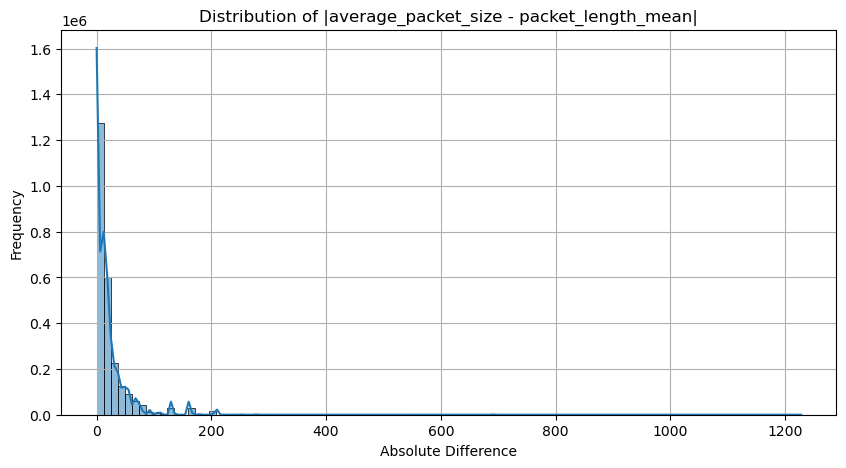

In [37]:
plot_difference_distribution(df_full, 'average_packet_size', 'packet_length_mean')


<b><dropping this feature too, seems like a duplicate: The vast majority of rows have abs diff = 0

A few outliers have non-zero differences

Just one (or very few) rows have a difference around 1200+

The giant spike at 0:
Over 1.6 million rows have zero difference → meaning for those, the two columns are identical

/b>

In [39]:
duplicate_pairs = [
    ('average_packet_size', 'packet_length_mean'),

]


In [40]:
df_full = drop_near_duplicate_columns(df_full, duplicate_pairs, tolerance=1e-6)

 Columns differ significantly. Previewing differences:
   average_packet_size  packet_length_mean
0                  9.0                 6.0
1                  9.0                 6.0
2                  9.0                 6.0
3                  9.0                 6.0
4                  9.0                 6.0


In [43]:
len(df_full.columns)

77

In [42]:
df_full = drop_near_duplicate_columns(df_full, duplicate_pairs, tolerance=1e-6)

 Columns differ significantly. Previewing differences:
   average_packet_size  packet_length_mean
0                  9.0                 6.0
1                  9.0                 6.0
2                  9.0                 6.0
3                  9.0                 6.0
4                  9.0                 6.0


In [47]:

df_full['packet_length_mean'].head()

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: packet_length_mean, dtype: float64

In [ ]:
df_full.drop(columns=[
    'average_packet_size',
    'avg_fwd_segment_size',
    'avg_bwd_segment_size'
], inplace=True)

print("Dropped duplicate columns based on paper recommendations.")

In [50]:
len(df_full.columns)

74